# COMP24111 - Exercise 2: News Article Classification

## 1. Task description

You will work on a news article classification task.
The provided dataset includes a total of 800 articles taken from Reuters newswire.
They belong to 4 classes: "earn" (0), "crude" (1), "trade" (2) and "interest" (3).
There are 200 articles per class.
Each article is characterised by word occurrences.
The list of used words is called a vocabulary.
In our dataset, the vocabulary includes a total of 6428 words. 

## 2. Preparation

First we need to import the data.
Run the below cell to load the data using NumPy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse

data, labels, class_names, vocabulary = np.load("ReutersNews_4Classes_sparse.npy", allow_pickle=True)

### A Note on Sparsity

Most documents only contain a small subset of the vocabulary, resulting in a very sparse data matrix.
To take advantage of the sparsity, in this exercise `data` is represented as a `scipy.sparse.csr_matrix`, which can store sparse matrices efficiently while still allowing efficient row-based indexing.
You can learn more about `csr_matrix` and other ways of dealing with sparse matrices at https://docs.scipy.org/doc/scipy/reference/sparse.html.

Note, however, that `data` is **not** a normal NumPy array.
While most operations will be the same as with a normal dense array, **you cannot use a sparse matrix to index another matrix**.
If you need to do this, either first convert the matrix to a NumPy array with the `toarray()` method, or use methods specifically designed to work with sparse matrices.

In [2]:
print(data[41,:]) # A sparse row vector; the output will be the non-zero indices and their values.
print(data[41,:].toarray()) # Convert back to a NumPy array. Note that the result is a (1, 6428) matrix, not a vector.
# print(vocabulary[data[41,:] > 0]) # Can't index vocabulary with a sparse matrix.
rows, columns, values = scipy.sparse.find(data[41,:]) # Find the non-zero entries in the 42nd document.
print(vocabulary[columns]) # Prints the words present in the 42nd document.

  (0, 2)	1
  (0, 3)	3
  (0, 5)	1
  (0, 8)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 21)	2
  (0, 24)	1
  (0, 105)	1
  (0, 127)	1
  (0, 227)	1
  (0, 275)	1
  (0, 334)	2
  (0, 341)	1
  (0, 348)	1
  (0, 359)	1
  (0, 411)	1
  (0, 426)	1
  (0, 1428)	1
  (0, 2058)	1
  (0, 5555)	1
[[0 0 1 ... 0 0 0]]
['share' 'split' 'say' 'two-for-one' 'shareholder' 'annual' 'meeting'
 'reuter' 'ct' 'note' 'company' 'pay' 'subject' 'increase' 'stock'
 'dividend' 'april' 'northern' 'declare' 'approval' 'telecom' 'post-split'
 'nt']


To see the full vocabulary, you can run

In [3]:
print(", ".join(vocabulary))

island, telephone, share, split, approve, say, previously, announce, two-for-one, common, shareholder, annual, meeting, reuter, year, net, shr, loss, nil, vs, profit, ct, rev, mln, note, current, include, charge, discontinue, operation, dlr, ec, state, tax, majority, european, community, member, strong, reservation, import, domestically-produced, oil, fat, propose, commission, senior, diplomat, special, committee, agricultural, expert, voice, objection, measure, prepare, ground, farm, begin, monday, add, france, italy, indicate, support, proposal, lead, initially, tonne, 1987/88, price, round, complete, sale, french, unit, business, compagnie, francaise, group, investor, employee, minnesota, disclose, term, deal, plan, asset, electronic, shoe, town, end, jan, respectively, december, wisconsin, fwb, buy, bank, corp, acquire, bancshare, cash, acquisition, hold, company, total, billion, purchase, time, earning, office, paul, area, american, product, 3rd, qtr, period, feb, mth, avg, 4th, s

You can see how many times article $i$ contains word $j$ using

In [4]:
i, j = 40, 2
print(data[i,j])

4


You can see which class the $i$th article belongs to using

In [5]:
print(labels[i])

0


For instance, by running

In [6]:
print("Occurrences:", data[0,10])
print("Class:", class_names[labels[0]])
print("Word:", vocabulary[10])

Occurrences: 2
Class: earn
Word: shareholder


you can see that the 11th word appears twice in the first document, the first document belongs to the class "earn", and the 11th word is "shareholder".

The following function randomly selects a subset of the data.

In [7]:
def sample_indices(labels, *num_per_class):
    """
    Returns randomly selected indices. It will return the specified number of indices for each class.
    """
    indices = []
    for cls, num in enumerate(num_per_class):
        cls_indices = np.where(labels == cls)[0]
        indices.extend(np.random.choice(cls_indices, size=num, replace=False))
    return np.array(indices)

For instance, to get one sample from the first class, two from the second, three from the third, and four from the fourth, you can run:

In [8]:
indices = sample_indices(labels, 1, 2, 3, 4)
print("Returned indices:", indices)
print("Samples:", data[indices])
print("Corresponding classes:", labels[indices])

Returned indices: [123 322 349 473 410 548 770 640 764 656]
Samples:   (0, 6062)	1
  (0, 2741)	1
  (0, 122)	1
  (0, 120)	1
  (0, 117)	1
  (0, 89)	1
  (0, 30)	2
  (0, 23)	3
  (0, 22)	2
  (0, 21)	2
  (0, 19)	6
  (0, 16)	2
  (0, 15)	3
  (0, 13)	1
  (1, 6016)	1
  (1, 5802)	4
  (1, 4095)	1
  (1, 3899)	8
  (1, 3751)	1
  (1, 3630)	1
  (1, 3347)	1
  (1, 2906)	1
  (1, 2300)	1
  (1, 2297)	1
  (1, 2259)	3
  :	:
  (8, 806)	1
  (8, 769)	1
  (8, 645)	1
  (8, 570)	1
  (8, 566)	1
  (8, 544)	2
  (8, 379)	1
  (8, 332)	3
  (8, 293)	1
  (8, 292)	1
  (8, 290)	5
  (8, 236)	1
  (8, 188)	1
  (8, 152)	1
  (8, 98)	5
  (8, 30)	1
  (8, 21)	1
  (8, 13)	1
  (8, 5)	2
  (9, 1501)	1
  (9, 984)	1
  (9, 668)	1
  (9, 456)	1
  (9, 332)	1
  (9, 178)	1
Corresponding classes: [0 1 1 2 2 2 3 3 3 3]


## 3. k-NN implementation

Now, you will need to implement a k-NN classifier by filling the code below.
This function should support two types of distance measures: Euclidean distance and cosine distance.
It should take a set of training samples, a user-specified neighbour number, a distance option, and features of a set of testing samples as the input.
It should return the predicted classes for the input set of testing samples.

In order to complete this function, you will need the `sklearn.metrics.pairwise_distances` function which can handle sparse matrices, below imported as `cdist` to follow SciPy conventions (not to be confused with the `pdist` function).
You should also research NumPy functions relating to sorting.

**Your implementation must NOT make use of Python loops over individual samples or features**.
You should use functions that operate on whole matrices, as this will be much faster than looping in Python.
Each experiment below is expected to take no more than 2 minutes to run.

In [9]:
import scipy.stats
from sklearn.metrics import pairwise_distances as cdist

def knn_classify(test_samples, training_data, training_labels, metric="euclidean", k=1):
    """
    Performs k-nearest neighbour classification on the provided samples,
    given training data and the corresponding labels.
    
    test_samples: An m x d matrix of m samples to classify, each with d features.
    training_data: An n x d matrix consisting of n training samples, each with d features.
    training_labels: A vector of size n, where training_labels[i] is the label of training_data[i].
    metric: The metric to use for calculating distances between samples.
    k: The number of nearest neighbours to use for classification.
    
    Returns: A vector of size m, where out[i] is the predicted class of test_samples[i].
    """
    # Calculate an m x n distance matrix.
    #which will return the distance between each test data to every training data.
    pairwise_distance = cdist(test_samples, training_data, metric)
    
    # Find the k nearest neighbours of each samples as an m x k matrix of indices.
    #sort the pairwise distance matrix by row, and sort it 
    #then catch the samllest k item.
    nearest_neighbours = np.argsort(pairwise_distance, axis=1)[:, :k]
    
    # Look up the classes corresponding to each index.
    #for each row, the value is the sample article number, find the class by labels[indices]
    nearest_labels = training_labels[nearest_neighbours] 
    
    # Return the most frequent class on each row.
    #return first row is the value, second row is the frequency.
    result = scipy.stats.mode(nearest_labels, axis= 1)
    # Note: Ensure that the returned vector does not contain any empty dimensions.
    # You may find the squeeze method useful here.
    return np.squeeze(result)[0]

## 4. Experiments

Use your k-NN function to perform the following experiments.

### Experiment 1

Randomly select 80 articles per class for training, and use the remaining articles for testing.
Select an appropriate neighbour number.
Train your k-NN classifier using the Euclidean distance and test it.
Repeat this process 20 times (trials).
Calculate the mean and standard deviation of the testing accuracies.

In [10]:
random_select = 80
sample_total = np.arange(800)
accuracy = np.zeros([20])

for i in range(20):
    # Random select 80 article data.
    train_indices = sample_indices(labels, random_select, random_select, random_select, random_select)
    training_data = data[train_indices]
    #find the rest sample as testing data.
    test_indices = np.setdiff1d(sample_total,train_indices)
    test_samples = data[test_indices]
    #training_labels read by label list
    training_labels = labels[train_indices]
    #applying k-NN function 
    result = knn_classify(test_samples, training_data, training_labels, "euclidean", 3)
    #start to find the error rate 
    accuracy[i] = ((result[0:120] == 0).sum() + (result[120:240] == 1).sum() + (result[240:360] == 2).sum() + (result[360:480] == 3).sum())/480

print("Mean accuracy is: ", accuracy.mean())
print("Standard deviation: ", accuracy.std())

Mean accuracy is:  0.8754166666666666
Standard deviation:  0.0299493206192654


Use the same neighbour number, but use the cosine distance instead of the Euclidean distance.
Repeat the same experiment.

In [11]:
import random #from standard library 
random_select = 80
sample_total = np.arange(800)
accuracy = np.zeros([20])

for i in range(20):
    # Random select 80 article data.
    train_indices = sample_indices(labels, random_select, random_select, random_select, random_select)
    training_data = data[train_indices]
    #find the rest sample as testing data.
    test_indices = np.setdiff1d(sample_total,train_indices)
    test_samples = data[test_indices]
    #training_labels read by label list
    training_labels = labels[train_indices]
    #applying k-NN function 
    result = knn_classify(test_samples, training_data, training_labels, "cosine", 3)
    #start to find the error rate 
    accuracy[i] = ((result[0:120] == 0).sum() + (result[120:240] == 1).sum() + (result[240:360] == 2).sum() + (result[360:480] == 3).sum())/480

print("Mean accuracy is: ", accuracy.mean())
print("Standard deviation: ", accuracy.std())

Mean accuracy is:  0.9633333333333333
Standard deviation:  0.008239049972202159


Which distance measure gives better performance?

### Experiment 2

Using the distance measure that you found performs better, repeat the same experiment, varying the neighbour number $k$ from 1 to 50.
This time, record the average training errors and standard deviation over 20 trials, for different values of $k$.
Do the same for testing errors.

In [12]:
K_train_error = np.zeros([50,2]) #first column is mean, seconding is standard deviation
K_train_accuracy = np.zeros([50])
K_train_accuracy_bar = np.zeros([50])
K_test_error = np.zeros([50,2])

#loops k from 1 to 50
for j in range(1, 51):
    random_select = 80
    sample_total = np.arange(800)
    train_error = np.zeros([20])
    test_error = np.zeros([20])
    train_accuracy = np.zeros([20])

    #loop 20 trials
    for i in range(20):
        train_indices = sample_indices(labels, random_select, random_select, random_select, random_select)
        training_data = data[train_indices]
        test_indices = np.setdiff1d(sample_total,train_indices)
        test_samples = data[test_indices]
        training_labels = labels[train_indices]
        #apply for training error
        result = knn_classify(training_data, training_data, training_labels, "cosine", j)
        train_error[i] = ((result[0:80] != 0).sum() + (result[80:160] != 1).sum() + (result[160:240] != 2).sum() + (result[240:320] != 3).sum())/320
        train_accuracy[i] = 1 - train_error[i]
        #apply for testing error 
        result = knn_classify(test_samples, training_data, training_labels, "cosine", j)
        test_error[i] = ((result[0:120] != 0).sum() + (result[120:240] != 1).sum() + (result[240:360] != 2).sum() + (result[360:480] != 3).sum())/480

    #store trainning accruracy. 
    K_train_accuracy[j-1] = train_accuracy.mean()
    K_train_accuracy_bar[j-1] = train_accuracy.std()
    
    #store two error rate in to matrix.
    K_train_error[j-1,0] = train_error.mean()
    K_train_error[j-1,1] = train_error.std()
    K_test_error[j-1,0] = test_error.mean()
    K_test_error[j-1,1] = test_error.std()

#print all the results relevent to k 
for a in range(50):
        print("K = % 2d | mean training errors: % 10.7f   | standard training deviation:  % 10.7f"%(a + 1, K_train_error[a,0], K_train_error[a,1]))
        print("K = % 2d | mean  testing errors: % 10.7f   |  standard testing deviation:  % 10.7f"%(a + 1, K_test_error[a,0], K_test_error[a,1]))
        print()


K =  1 | mean training errors:  0.0000000   | standard training deviation:   0.0000000
K =  1 | mean  testing errors:  0.0352083   |  standard testing deviation:   0.0090067

K =  2 | mean training errors:  0.0135938   | standard training deviation:   0.0061137
K =  2 | mean  testing errors:  0.0426042   |  standard testing deviation:   0.0079187

K =  3 | mean training errors:  0.0164063   | standard training deviation:   0.0050268
K =  3 | mean  testing errors:  0.0416667   |  standard testing deviation:   0.0095697

K =  4 | mean training errors:  0.0226562   | standard training deviation:   0.0109096
K =  4 | mean  testing errors:  0.0388542   |  standard testing deviation:   0.0070734

K =  5 | mean training errors:  0.0235937   | standard training deviation:   0.0071586
K =  5 | mean  testing errors:  0.0398958   |  standard testing deviation:   0.0064642

K =  6 | mean training errors:  0.0246875   | standard training deviation:   0.0077119
K =  6 | mean  testing errors:  0.0413

Produce an error bar plot showing the training accuracy for each $k$ here:

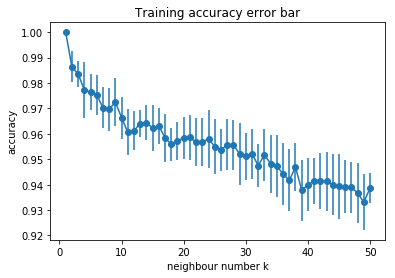

In [13]:
from matplotlib import pyplot as plt

x = np.arange(1,51)
plt.errorbar(x, K_train_accuracy, K_train_accuracy_bar,marker = "o")
plt.xlabel('neighbour number k')
plt.ylabel('accuracy')
plt.title('Training accuracy error bar')
plt.show()

Produce your testing error bar plot here:

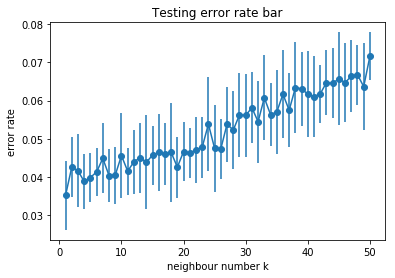

In [14]:
x = np.arange(1,51)
y = []
y_err = []
for i in range(50):
    y.append(K_test_error[i,0])
    y_err.append(K_test_error[i,1])
plt.xlabel('neighbour number k')
plt.ylabel('error rate')
plt.title('Testing error rate bar')
plt.errorbar(x,y,y_err,marker = "o")
plt.show()

**Remember that all graphs should have axis labels and a title.**

Now, answer a few questions according to what you have observed.

Q1. What is the training accuracy obtained when $k=1$? Explain it.

Q2. Do the testing and training accuracies differ, and why?

Q3. How do the accuracies change as $k$ gets bigger, and why?

### Experiment 3

Compare three 5-NN classifiers using cosine distance.
First, randomly select 100 articles per class and keep these as your testing samples.

In [19]:
random_select = 100
sample_total = np.arange(800)
test_indices = sample_indices(labels, random_select, random_select, random_select, random_select)
test_samples = data[test_indices]


Then do the following:

(1) Train the first classifier using all the remaining articles.
Compute the confusion matrix for the 4 classes using the testing samples.

In [20]:
train_indices = np.setdiff1d(sample_total,test_indices)
training_data = data[train_indices]
training_labels = labels[train_indices]
result = knn_classify(test_samples, training_data, training_labels, "cosine", 5)
#prepare the matrix for class 0 

for i in range(4):
    current_bound = i * 100
    bound_of_class = current_bound + 100 
    name = ["con_mateix_class0", "con_mateix_class1", "con_mateix_class2", "con_mateix_class3"]
    name[i] = np.zeros([2,2])
    name[i][0,0] = (result[current_bound:bound_of_class] == i).sum()
    name[i][1,0] = (result[current_bound:bound_of_class] != i).sum()
    name[i][0,1] = (result[0:400] == i).sum() - name[i][0,0]
    name[i][1,1] = 400 - name[i][0,0] - name[i][1,0] - name[i][0,1]
    recall = name[i][0,0]/(name[i][0,0] + name[i][1,0])
    precision = name[i][0,0]/(name[i][0,0] + name[i][0,1])
    F1 = (2 * precision * recall)/(precision + recall)
    print("Class_%d:"%(i))
    print(name[i])
    print("Class_%d F1 score: %f" %(i,F1))
    print()

Class_0:
[[ 96.   4.]
 [  4. 296.]]
Class_0 F1 score: 0.960000

Class_1:
[[ 96.   0.]
 [  4. 300.]]
Class_1 F1 score: 0.979592

Class_2:
[[ 94.   3.]
 [  6. 297.]]
Class_2 F1 score: 0.954315

Class_3:
[[ 99.   8.]
 [  1. 292.]]
Class_3 F1 score: 0.956522



(2) Randomly remove 95 training articles from class 1 ("crude").
Train the second classifier using the reduced training samples.
Compute the confusion matrix for the 4 classes using the testing samples.

In [21]:
class_1 = train_indices[100:200]
random = np.random.choice(class_1, 5, replace=False)
#choose 5 samples from class 1 randomly 
new_train_indices = np.setdiff1d(train_indices,class_1)
train_indices_1 = np.append(new_train_indices, random)
training_data = data[train_indices_1]
training_labels = labels[train_indices_1]
result = knn_classify(test_samples, training_data, training_labels, "cosine", 5)
#prepare the matrix for class 0 

for i in range(4):
    current_bound = i * 100
    bound_of_class = current_bound + 100 
    name = ["con_mateix_class0", "con_mateix_class1", "con_mateix_class2", "con_mateix_class3"]
    name[i] = np.zeros([2,2])
    name[i][0,0] = (result[current_bound:bound_of_class] == i).sum()
    name[i][1,0] = (result[current_bound:bound_of_class] != i).sum()
    name[i][0,1] = (result[0:400] == i).sum() - name[i][0,0]
    name[i][1,1] = 400 - name[i][0,0] - name[i][1,0] - name[i][0,1]
    recall = name[i][0,0]/(name[i][0,0] + name[i][1,0])
    precision = name[i][0,0]/(name[i][0,0] + name[i][0,1])
    F1 = (2 * precision * recall)/(precision + recall)
    print("Class_%d:"%(i))
    print(name[i])
    print("Class_%d F1 score: %f" %(i,F1))
    print()

Class_0:
[[ 96.  22.]
 [  4. 278.]]
Class_0 F1 score: 0.880734

Class_1:
[[ 40.   0.]
 [ 60. 300.]]
Class_1 F1 score: 0.571429

Class_2:
[[ 93.  31.]
 [  7. 269.]]
Class_2 F1 score: 0.830357

Class_3:
[[ 99.  19.]
 [  1. 281.]]
Class_3 F1 score: 0.908257



(3) Redo (2), but randomly remove 95 training articles from *all* the classes.
Train the third classifier using the new training data.
Compute the confusion matrix for the 4 classes using the testing samples.

In [22]:
class_0 = np.random.choice(train_indices[0:100],5, replace=False)
class_2 = np.random.choice(train_indices[200:300],5, replace=False)
class_3 = np.random.choice(train_indices[300:400],5, replace=False)
training_indices = np.concatenate((class_0, random, class_2, class_3), axis=None)
training_data = data[training_indices]
training_labels = labels[training_indices]
result = knn_classify(test_samples, training_data, training_labels, "cosine", 5)
#prepare the matrix for class 0 

for i in range(4):
    current_bound = i * 100
    bound_of_class = current_bound + 100 
    name = ["con_mateix_class0", "con_mateix_class1", "con_mateix_class2", "con_mateix_class3"]
    name[i] = np.zeros([2,2])
    name[i][0,0] = (result[current_bound:bound_of_class] == i).sum()
    name[i][1,0] = (result[current_bound:bound_of_class] != i).sum()
    name[i][0,1] = (result[0:400] == i).sum() - name[i][0,0]
    name[i][1,1] = 400 - name[i][0,0] - name[i][1,0] - name[i][0,1]
    recall = name[i][0,0]/(name[i][0,0] + name[i][1,0])
    precision = name[i][0,0]/(name[i][0,0] + name[i][0,1])
    F1 = (2 * precision * recall)/(precision + recall)
    print("Class_%d:"%(i))
    print(name[i])
    print("Class_%d F1 score: %f" %(i,F1))
    print()

Class_0:
[[ 81.   7.]
 [ 19. 293.]]
Class_0 F1 score: 0.861702

Class_1:
[[ 87.   6.]
 [ 13. 294.]]
Class_1 F1 score: 0.901554

Class_2:
[[ 94.  23.]
 [  6. 277.]]
Class_2 F1 score: 0.866359

Class_3:
[[ 91.  11.]
 [  9. 289.]]
Class_3 F1 score: 0.900990



Repeat the whole thing a few times.
Which of the three classifiers performs the worst?
Try to analyse why this might be.

## 5. Deliverables and Marking

By the deadline, you should submit one single Jupyter file using GitLab.
Please find the coursework submission instruction from the following link:
https://wiki.cs.manchester.ac.uk/index.php/UGHandbook19:Coursework

This exercise is worth 15 marks — marks will be allocated roughly on the basis of:
* rigorous experimentation,
* knowledge displayed when talking to the TA,
* problem solving skill,
* self-learning ability,
* how informative and well presented your graphs are,
* language and ease of reading.

You must be able to explain any code you've written in order to get full marks. During the marking session we will ask you to run all cells in your Jupyter file, so ensure that the file is runnable using the "Restart Kernel and Run All Cells" menu option.

The lab is marked out of 15:

|                          |         |
|:------------------------ |--------:|
| k-NN Implementation      | 3 marks |
| Experiment 1             | 4 marks |
| Experiment 2             | 4 marks |
| Experiment 3             | 4 marks |